# **Linear regression**

### Análisis de datos (EDA)

La importante compañía de seguros 4Geeks Insurance S.L. quiere calcular, en función de los datos fisiológicos de sus clientes, cuál va a ser la prima (coste) que debe asumir cada uno de ellos. Para ello, ha reunido a un equipo completo de médicos y en función de datos de otras compañías y un estudio particular han logrado reunir un conjunto de datos para entrenar un modelo predictivo.

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import pickle
from sklearn.feature_selection import f_classif, SelectKBest

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings

#### - Variables:
- age. Edad del beneficiario principal (numérico)
- sex. Género del beneficiario principal (categórico)
- bmi. índice de masa corporal (numérico)
- children. Número de niños/dependientes cubiertos por un seguro médico (numérico)
- smoker. ¿Es fumador? (categórico)
- region. Área residencial del beneficiario en USA: noreste, sureste, suroeste, noroeste (categórico)
- charges. Prima del seguro médico (numérico)

In [67]:
df_inicio = pd.read_csv('/workspaces/GuilloMansa-MachineLearning/data/raw/medical_insurance_cost.csv', sep=',')
df_inicio

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [68]:
df_inicio.info(), df_inicio.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(None, (1338, 7))

In [69]:
df_inicio.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [70]:
List_cat = df_inicio.select_dtypes(include=['object']).columns.tolist()

In [71]:
List_num = df_inicio.select_dtypes(include=['float64','int64']).columns.tolist()

In [72]:
List_cat, List_num

(['sex', 'smoker', 'region'], ['age', 'bmi', 'children', 'charges'])

In [73]:
df_inicio.duplicated().sum()

np.int64(1)

In [74]:
df_inicio.drop_duplicates(), df_inicio.duplicated().sum()

(      age     sex     bmi  children smoker     region      charges
 0      19  female  27.900         0    yes  southwest  16884.92400
 1      18    male  33.770         1     no  southeast   1725.55230
 2      28    male  33.000         3     no  southeast   4449.46200
 3      33    male  22.705         0     no  northwest  21984.47061
 4      32    male  28.880         0     no  northwest   3866.85520
 ...   ...     ...     ...       ...    ...        ...          ...
 1333   50    male  30.970         3     no  northwest  10600.54830
 1334   18  female  31.920         0     no  northeast   2205.98080
 1335   18  female  36.850         0     no  southeast   1629.83350
 1336   21  female  25.800         0     no  southwest   2007.94500
 1337   61  female  29.070         0    yes  northwest  29141.36030
 
 [1337 rows x 7 columns],
 np.int64(1))

Observaciones
- un total de 1337 registros x 7 rows. Sin nulos. 4 numericos y 3 categorico
- el promedio de 'age' es de 39.29 con un minimo de 18 años y maximo de 64
- el promedio de 1 niño asegurado y max 5, el 75% de las personas tienen como maximo 2.
- hay un bmi de minimo 15.96, maximo de 53,13. El 25% tiene bmi mayor a 34.
- el target 'charges' tiene min 1121 y max 63770, indica un rango amplio.

In [75]:
df_inicio['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [76]:
df_inicio.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.21,14.05,18.00,27.00,39.00,51.00,64.00
bmi,1338.0,30.66,6.10,15.96,26.30,30.40,34.69,53.13
children,1338.0,1.09,1.21,0.00,0.00,1.00,2.00,5.00
charges,1338.0,13270.42,12110.01,1121.87,4740.29,9382.03,16639.91,63770.43


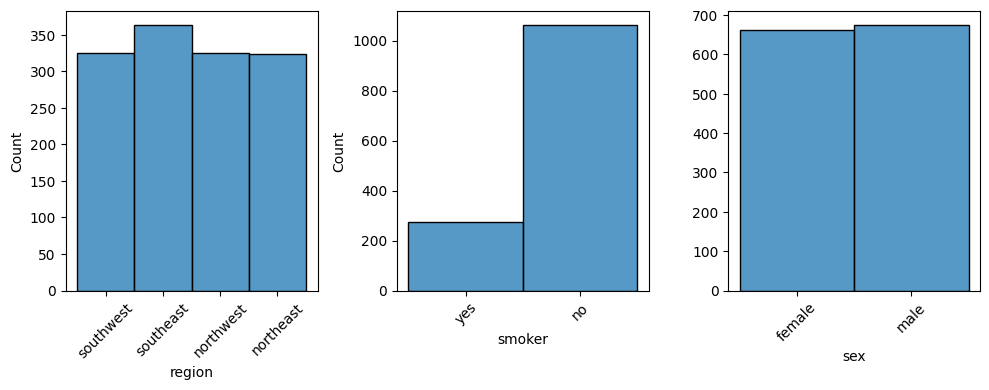

In [84]:
fig, axis = plt.subplots(1, 3, figsize=(10, 4))
sns.histplot(ax=axis[0], data=df_inicio, x="region")
sns.histplot(ax=axis[1], data=df_inicio, x="smoker")
sns.histplot(ax=axis[2], data=df_inicio, x="sex").set(ylabel=None)

axis[0].tick_params(axis='x',rotation=45)
axis[1].tick_params(axis='x',rotation=45)
axis[2].tick_params(axis='x',rotation=45)
plt.tight_layout()
plt.show()

de estas variables categoricas podemos decir que:
- esta equilibrado entre hombres y mujeres. 
- hay un equilibrio entre las regiones (ademas que nos parece irrelevante el lugar).
- hay mas no fumadores que los que si

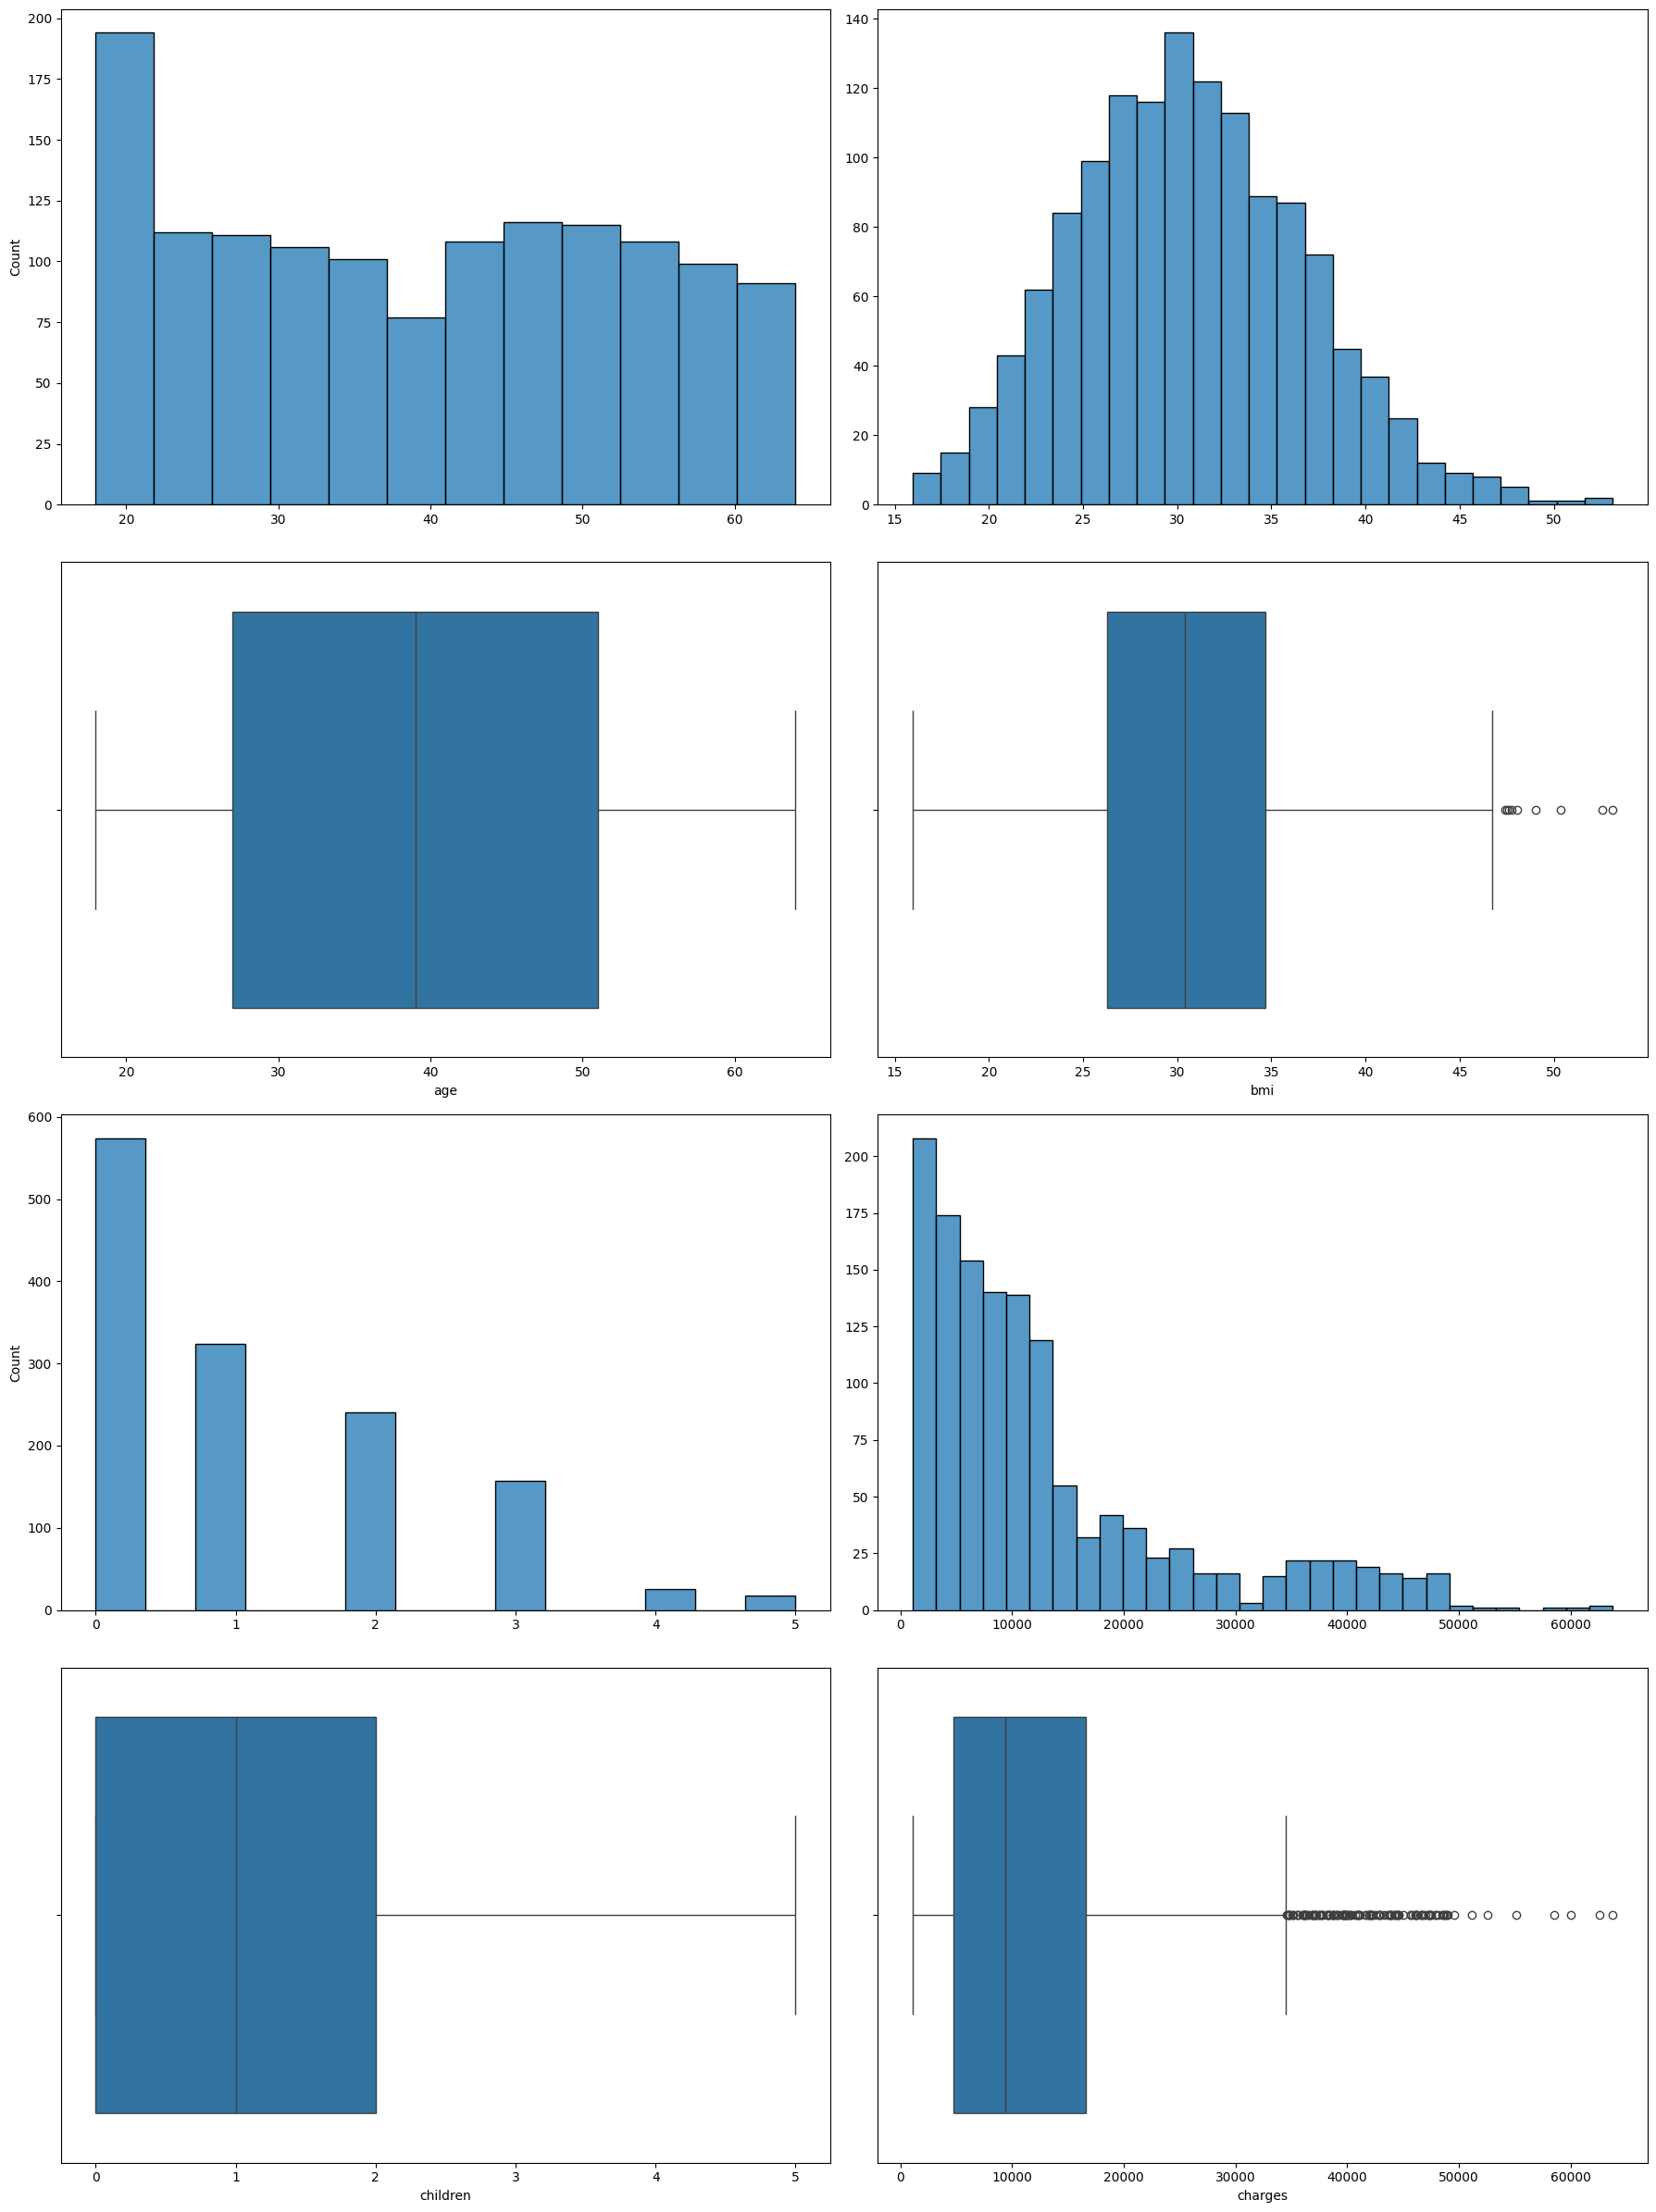

In [90]:
fig, axis = plt.subplots(4, 2, figsize=(18, 24))
#axis[0, 0].set_xticks(np.arange(0, 600, 100))
sns.histplot(ax=axis[0, 0], data=df_inicio, x="age").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df_inicio, x="age")
sns.histplot(ax=axis[0, 1], data=df_inicio, x="bmi").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df_inicio, x="bmi")
sns.histplot(ax=axis[2, 0], data=df_inicio, x="children").set(xlabel=None)
sns.boxplot(ax=axis[3, 0], data=df_inicio, x="children")
sns.histplot(ax=axis[2, 1], data=df_inicio, x="charges").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 1], data=df_inicio, x="charges")

plt.tight_layout()
plt.show()

Observaciones
- La media de las edades es de 39 aproximamente
- Existe un numero mas alto de personas que no tienen a nadie agregado a su seguro
- Se observan un gran nummero de outliers a partir de 35.000 y excasos a partir de 50.000.